In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines.datasets import load_waltons
from lifelines import *
from lifelines.utils import median_survival_times
from lifelines import AalenAdditiveFitter

In [2]:
df=pd.read_csv('data2//source.csv',encoding = 'utf-8')

In [10]:
df.columns

Index(['talk_cnt', 'talker_id', 'min_date', 'max_date', 'max_min', 'observed',
       'act_days', 'nickname', 'at_cnt', 'chatroom', 'if_at', 'company', 'PIS',
       'PES', 'SIS', 'SES', 'Id', 'degree', 'close', 'between', 'eigen',
       'Centrality', 'AvePost'],
      dtype='object')

In [22]:
df_des = df[['talk_cnt','max_min','observed','AvePost','SIS','PIS','SES','PES','Centrality']]
df_des[df_des.AvePost>df_des.AvePost.quantile(0.01)][df_des.AvePost<df_des.AvePost.quantile(0.99)].describe()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,talk_cnt,max_min,observed,AvePost,SIS,PIS,SES,PES,Centrality
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,77.412083,97.469793,0.644725,50.476124,20.175834,25.555455,3.301172,3.949504,26.366096
std,189.562470,98.047437,0.478812,88.826184,38.910231,66.172280,9.989047,10.584334,57.583618
min,1.000000,1.000000,0.000000,0.731707,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,0.000000,6.614173,2.000000,1.000000,0.000000,0.000000,2.000000
50%,22.000000,67.000000,1.000000,21.600000,7.000000,6.000000,0.000000,1.000000,8.000000
75%,69.000000,162.000000,1.000000,53.571429,21.000000,21.000000,2.000000,3.000000,26.000000
max,2674.000000,397.000000,1.000000,690.000000,463.000000,950.000000,158.000000,136.000000,604.000000


In [15]:
df_csv = df_des[df_des.talk_cnt>df_des.talk_cnt.quantile(0.01)][df_des.talk_cnt<df_des.talk_cnt.quantile(0.98)].describe()
#df_csv.to_csv("data//desc.csv",encoding = 'utf-8-sig')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [17]:
df_csv.corr()

,talk_cnt,max_min,observed,AvePost,SIS,PIS,SES,PES,Centrality
talk_cnt,1.000000,0.958911,0.817774,0.900564,0.917420,0.957281,0.851048,0.853976,0.972403
max_min,0.958911,1.000000,0.931930,0.747383,0.981798,0.990751,0.950403,0.951943,0.990675
observed,0.817774,0.931930,1.000000,0.489409,0.979249,0.949060,0.998162,0.997805,0.929098
AvePost,0.900564,0.747383,0.489409,1.000000,0.655621,0.739098,0.541338,0.546081,0.777066
SIS,0.917420,0.981798,0.979249,0.655621,1.000000,0.993188,0.989704,0.990491,0.984727
PIS,0.957281,0.990751,0.949060,0.739098,0.993188,1.000000,0.966399,0.967832,0.998300
SES,0.851048,0.950403,0.998162,0.541338,0.989704,0.966399,1.000000,0.999983,0.949789
PES,0.853976,0.951943,0.997805,0.546081,0.990491,0.967832,0.999983,1.000000,0.951537
Centrality,0.972403,0.990675,0.929098,0.777066,0.984727,0.998300,0.949789,0.951537,1.000000


In [5]:
df[['AvePost','SIS','PIS','SES','PES','Centrality']].max()

AvePost       1908.0
SIS           1118.0
PIS           6000.0
SES            242.0
PES            282.0
Centrality    1747.0
dtype: float64

In [27]:
df[df.AvePost>2].corr()

,talk_cnt,max_min,observed,act_days,at_cnt,if_at,company,PIS,PES,SIS,SES,Id,degree,close,between,eigen,Centrality,AvePost
talk_cnt,1.000000,0.243998,-0.168221,0.795021,0.321872,0.937939,0.942504,0.982176,0.929303,0.934902,0.696642,-0.135414,0.295897,0.213446,0.397889,0.177323,0.907702,0.486643
max_min,0.243998,1.000000,-0.228951,0.583662,0.177768,0.340131,0.208158,0.209338,0.263656,0.363791,0.230475,-0.111742,0.210014,0.426682,0.211325,0.163194,0.347673,-0.178537
observed,-0.168221,-0.228951,1.000000,-0.266660,-0.110968,-0.178790,-0.184099,-0.136377,-0.204511,-0.203977,-0.190944,0.205440,-0.095935,-0.278440,-0.118064,-0.127353,-0.188068,-0.023346
act_days,0.795021,0.583662,-0.266660,1.000000,0.339983,0.858238,0.728134,0.753337,0.771151,0.860407,0.609274,-0.235585,0.386474,0.387527,0.511548,0.261889,0.844353,0.233028
at_cnt,0.321872,0.177768,-0.110968,0.339983,1.000000,0.309461,0.390473,0.274554,0.313479,0.297490,0.283198,-0.093922,0.528326,0.151018,0.386124,0.572561,0.570461,0.315168
if_at,0.937939,0.340131,-0.178790,0.858238,0.309461,1.000000,0.834902,0.929004,0.851617,0.938361,0.631278,-0.150591,0.326125,0.274602,0.461053,0.191835,0.957543,0.391239
company,0.942504,0.208158,-0.184099,0.728134,0.390473,0.834902,1.000000,0.874597,0.965241,0.875539,0.790997,-0.142778,0.308121,0.221874,0.332949,0.218924,0.839504,0.559771
PIS,0.982176,0.209338,-0.136377,0.753337,0.274554,0.929004,0.874597,1.000000,0.858233,0.887951,0.577160,-0.109798,0.270528,0.167391,0.404553,0.146782,0.885639,0.435758
PES,0.929303,0.263656,-0.204511,0.771151,0.313479,0.851617,0.965241,0.858233,1.000000,0.900507,0.820203,-0.162958,0.281817,0.258115,0.319612,0.191093,0.830599,0.515245
SIS,0.934902,0.363791,-0.203977,0.860407,0.297490,0.938361,0.875539,0.887951,0.900507,1.000000,0.754782,-0.176284,0.290530,0.302330,0.365428,0.178196,0.900674,0.427807


In [17]:
df.columns

Index(['talk_cnt', 'talker_id', 'min_date', 'max_date', 'max_min', 'observed',
       'act_days', 'nickname', 'at_cnt', 'chatroom', 'if_at', 'company', 'PIS',
       'PES', 'SIS', 'SES', 'Id', 'degree', 'close', 'between', 'eigen',
       'Centrality', 'AvePost'],
      dtype='object')

In [18]:
l = list()
for i in range(0,len(df)):
    if df['max_min'][i]>=30:
        s=df['talk_cnt'][i]/df['max_min'][i]*30
        l.append(s)
    else:
        l.append(df['talk_cnt'][i])

In [19]:
df['AvePost1'] = pd.DataFrame(l)

In [81]:
df_ = df[['max_min','observed','chatroom','AvePost1']]
df_ = df_[df_.AvePost1>2][df_.AvePost1<df_.AvePost1.quantile(0.97)]
cph = CoxPHFitter()
#cph.fit(df_, duration_col='max_min', event_col='observed') #strata=['mean_talk']
cph.fit(df_, duration_col='max_min', event_col='observed',cluster_col='chatroom') #strata=['mean_talk']
cph.print_summary(decimals =3)  # access the results using cph.summary

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [27]:
#最优模型
df_ = df[['max_min','observed','chatroom','AvePost1','PIS','PES','SIS','SES']]
#df_ = df_[df_.AvePost1>2][df_.AvePost1<df_.AvePost1.quantile(0.98)]
cph = CoxPHFitter()
cph.fit(df_, duration_col='max_min', event_col='observed',cluster_col='chatroom') #strata=['mean_talk']
cph.print_summary(decimals =3)  # access the results using cph.summary

In [82]:
#最优模型
df_ = df[['max_min','observed','chatroom','AvePost','SIS','PIS','SES','PES','Centrality']]
df_ = df_[df_.AvePost>2][df_.AvePost<df_.AvePost.quantile(0.98)]
cph = CoxPHFitter()
cph.fit(df_, duration_col='max_min', event_col='observed',cluster_col='chatroom') #strata=['mean_talk']
cph.print_summary(decimals =3)  # access the results using cph.summary

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


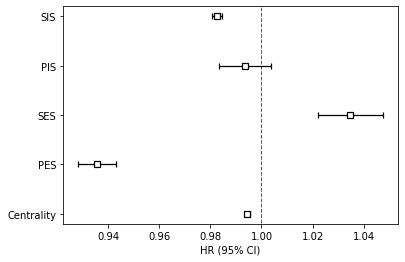

In [83]:
cph.plot(columns = ['SIS','PIS','SES','PES','Centrality'],hazard_ratios=True)
plt.savefig("img//result1.png",dpi=300)

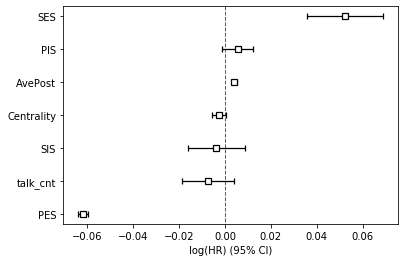

In [56]:
cph.plot()
#plt.savefig("img//result.png",dpi=300)

In [33]:
#cph.check_assumptions(df_, p_value_threshold=0.05, show_plots=True)
# 可以用proportional_hazard_test进行检验
from lifelines.statistics import proportional_hazard_test
results = proportional_hazard_test(cph, df_, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

[]

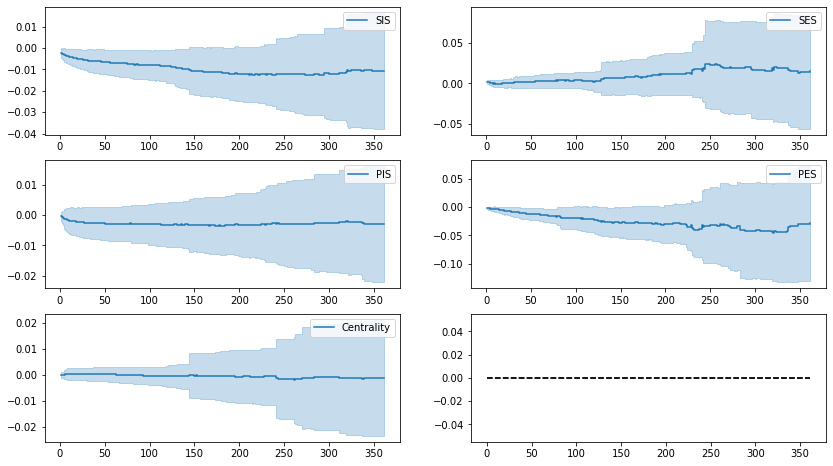

In [146]:
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
aaf.plot('SIS',ax=axes[0][0])
aaf.plot('SES',ax=axes[0][1])
aaf.plot('PIS',ax=axes[1][0])
aaf.plot('PES',ax=axes[1][1])
aaf.plot('Centrality',ax=axes[2][0])
plt.plot(ax=axes[2][0])
#plt.legend()
#plt.savefig("img//aaf.png",dpi=300)